<a href="https://colab.research.google.com/github/SamSilv2/Exerc-cios-MBT-Data-Science-e-IA/blob/main/Semana4_Exercicio_Resolucao_Samuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Este exercicío é referente a S2D5 Análise de Agrupamentos. Ele está sendo enviado em 26/11/2023 por meio deste link em função de um erro na hora de enviar a atividade da semana anterior.


# Exercício


Neste exercício, tentaremos identificar diferentes `perfis de clientes` de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket`.

O dataset está disponível em [formato .csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) ou em [formato .xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Days_Registered`: Quantidade de Dias desde o cadastro

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário



**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


Obs: este dataset foi `adaptado` a partir do original encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/1 - Atividades Sirius/S4 Análise de Grupos/customer_supermarket.xlsx')
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,2020-09-04,849,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,2022-03-08,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,2021-08-21,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,2022-02-10,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,2022-01-19,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Atividade 2: Faça o tratamento dos Dados.
Dica: verifique `dados ausentes` e `outliers` e, se necessário, remova as linhas.

In [ ]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Days_Registered         0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1976.805804,52247.251354,0.444196,0.506250,539.582143,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,202.122512,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1901.000000,1730.000000,0.000000,0.000000,186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1967.000000,35303.000000,0.000000,0.000000,366.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1978.000000,51381.500000,0.000000,0.000000,541.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1985.000000,68522.000000,1.000000,1.000000,715.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2004.000000,666666.000000,2.000000,2.000000,885.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
print(df.dtypes)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Days_Registered                 int64
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain    

In [ ]:
df['ID'] = df['ID'].astype(object)
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'], axis=1)

In [ ]:
q1 = df_numeric.quantile(0.25)
q3 = df_numeric.quantile(0.75)
iqr = q3 - q1
outliers = ((df_numeric < (q1 - 1.5 * iqr)) | (df_numeric > (q3 + 1.5 * iqr))).any(axis=1)
df_clean = df.dropna()
df_clean = df_clean[~outliers]

<ipython-input-11-209b0472e9f7>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[~outliers]


In [ ]:
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1962,Graduation,Single,46344.0,1,1,2022-03-08,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,2021-08-21,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,2022-02-10,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,2022-01-19,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1975,Master,Together,62513.0,0,1,2021-09-09,479,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0


In [ ]:
df_clean.describe()

,Year_Birth,Income,Kidhome,Teenhome,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.0,1517.0,1517.000000
mean,1977.414634,43474.413316,0.569545,0.557680,522.677653,48.933421,189.767304,10.413975,70.448912,15.173368,10.462755,24.052736,2.262360,3.379697,1.505603,4.798286,5.927488,0.067238,0.063283,0.023731,0.023072,0.008570,0.009888,3.0,11.0,0.104812
std,11.341840,17205.800027,0.543560,0.543736,200.172154,29.060603,267.157532,15.734481,101.002303,23.289752,15.700343,25.616486,1.364258,2.448317,1.953821,2.790896,1.962717,0.250516,0.243551,0.152260,0.150181,0.092205,0.098978,0.0,0.0,0.306412
min,1948.000000,5305.000000,0.000000,0.000000,186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1968.000000,30538.000000,0.000000,0.000000,343.000000,24.000000,13.000000,1.000000,11.000000,2.000000,1.000000,6.000000,1.000000,2.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1979.000000,42160.000000,1.000000,1.000000,514.000000,49.000000,54.000000,4.000000,26.000000,6.000000,4.000000,15.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1986.000000,55707.000000,1.000000,1.000000,689.000000,74.000000,255.000000,12.000000,85.000000,17.000000,13.000000,34.000000,3.000000,5.000000,2.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2004.000000,90933.000000,2.000000,2.000000,885.000000,99.000000,1218.000000,81.000000,545.000000,120.000000,81.000000,126.000000,6.000000,11.000000,10.000000,13.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<Axes: >

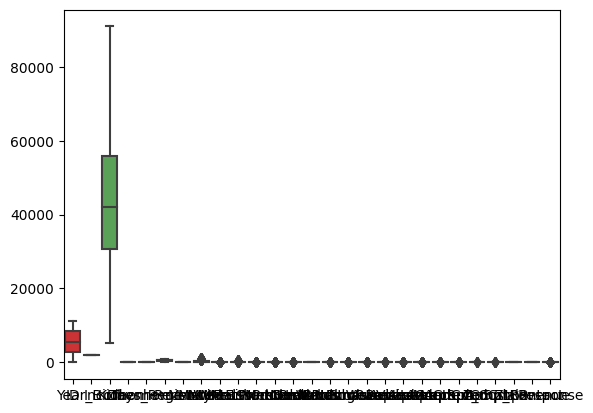

In [ ]:
sns.boxplot(data=df_clean, palette="Set1",)

### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [ ]:
df_clean['MntTotal'] = df_clean['MntFruits'] + df_clean['MntMeatProducts'] + df_clean['MntSweetProducts'] + df_clean['MntWines'] + df_clean['MntGoldProds']
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal
1,2174,1962,Graduation,Single,46344.0,1,1,2022-03-08,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,25
2,4141,1973,Graduation,Together,71613.0,0,0,2021-08-21,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,665
3,6182,1992,Graduation,Together,26646.0,1,0,2022-02-10,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,43
4,5324,1989,PhD,Married,58293.0,1,0,2022-01-19,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,376
5,7446,1975,Master,Together,62513.0,0,1,2021-09-09,479,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,716


### Atividade 4: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [ ]:
df_filtrado = df_clean[['Recency', 'Days_Registered', 'MntTotal', 'Income']]
df_filtrado.head()

,Recency,Days_Registered,MntTotal,Income
1,38,299,25,46344.0
2,26,498,665,71613.0
3,26,325,43,26646.0
4,94,347,376,58293.0
5,16,479,716,62513.0


### Atividade 5: Padronize os dados.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled  = df_filtrado.copy()

df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

df_scaled.head()

,Recency,Days_Registered,MntTotal,Income
1,-0.376352,-1.117795,-0.754781,0.166835
2,-0.789419,-0.123323,0.969536,1.635952
3,-0.789419,-0.987864,-0.706285,-0.978389
4,1.551291,-0.877922,0.190899,0.861539
5,-1.133641,-0.218272,1.106942,1.106886


### Atividade 6: Faça um agrupamento hierárquico e plote o dendograma.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
distancias = linkage(df_scaled,
                     method='ward',
                     metric='euclidean')

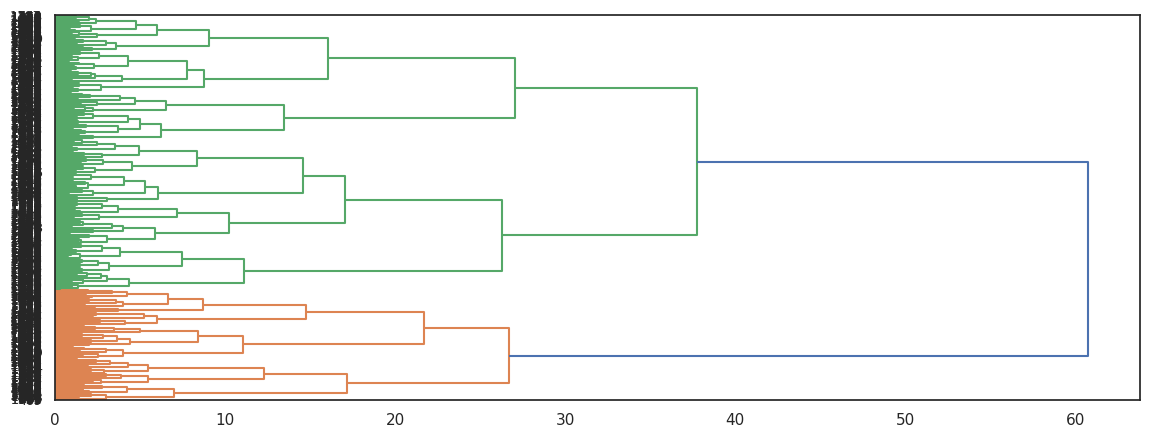

In [ ]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

dn = dendrogram(distancias,
                leaf_font_size=9,
                orientation='right')

### Atividade 7: Encontre a quantidade que parece adequada para o número de grupos.
Dicas:
* Faça a análise a partir do dendrograma acima, escolha uma quantidade de clusters que parecer adequada e crie uma coluna com o nome `grupos` no dataframe.
* Adicione a coluna `grupos` ao dataframe contendo todas as variáveis (e não somente aquelas utilizadas para os agrupamentos), assim você poderá fazer uma análise mais ampla dos consumidores.
* Para o propósito deste exercício, utilize um `máximo` de 4 grupos para permitir uma boa visualização nas etapas a seguir.

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
max_d = 30
grupos = fcluster(distancias, t=max_d, criterion='distance')
grupos

array([3, 1, 3, ..., 1, 1, 2], dtype=int32)

In [ ]:
df_clean['grupos'] = grupos

In [ ]:
df_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal,grupos
1,2174,1962,Graduation,Single,46344.0,1,1,2022-03-08,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,25,3
2,4141,1973,Graduation,Together,71613.0,0,0,2021-08-21,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,665,1
3,6182,1992,Graduation,Together,26646.0,1,0,2022-02-10,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,43,3
4,5324,1989,PhD,Married,58293.0,1,0,2022-01-19,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,376,1
5,7446,1975,Master,Together,62513.0,0,1,2021-09-09,479,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,716,1


### Atividade 8: Crie Gráficos para visualizar os Grupos.

#### Atividade 8.1: Crie Visualizações em Boxplot
Dica: utilize o Seaborn para criar boxplots com os clusters selecionados.

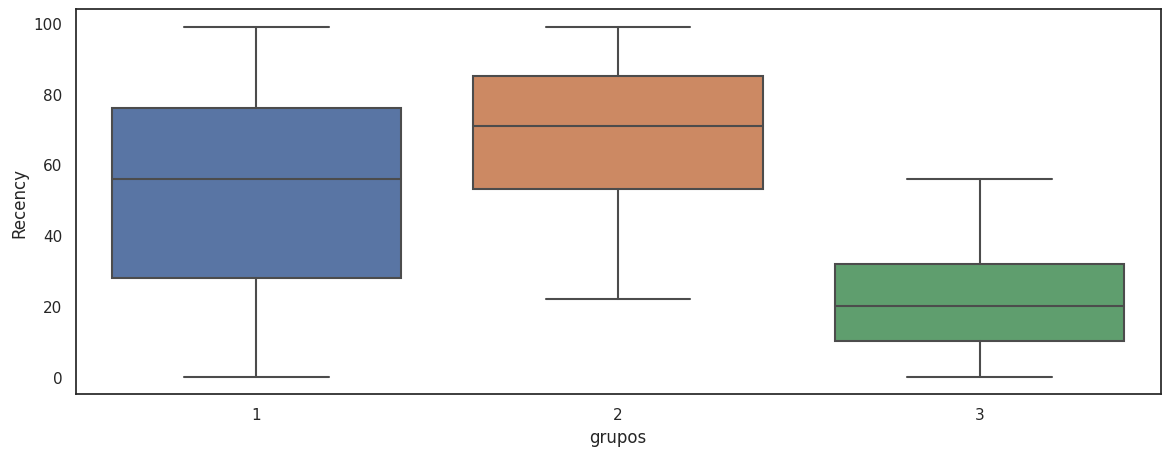

In [ ]:
sns.boxplot(data=df_clean, x='grupos', y='Recency');

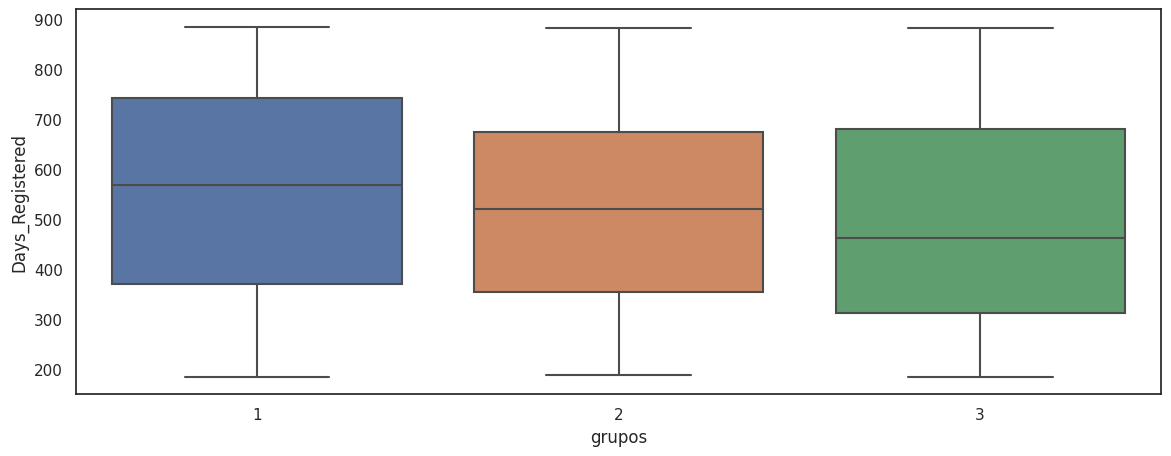

In [ ]:
sns.boxplot(data=df_clean, x='grupos', y='Days_Registered');

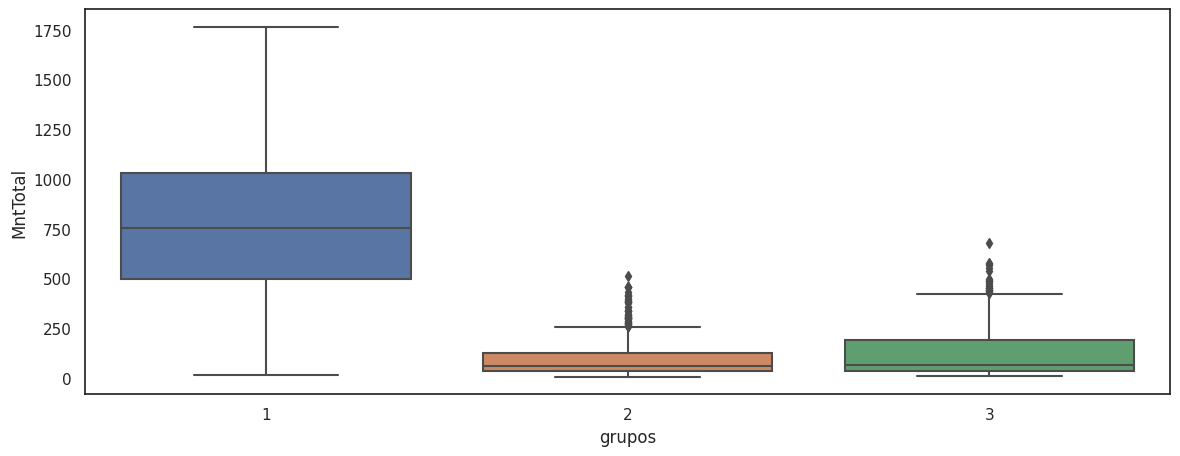

In [ ]:
sns.boxplot(data=df_clean, x='grupos', y='MntTotal');

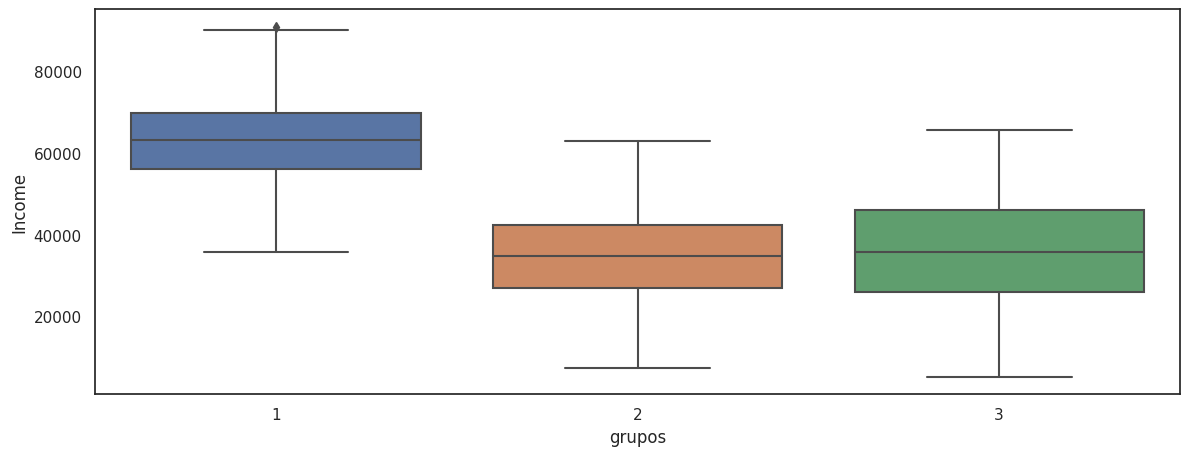

In [ ]:
sns.boxplot(data=df_clean, x='grupos', y='Income');

#### Atividade 8.2: Crie Histogramas para visualizar os Grupos
Dica: utilize o Seaborn para plotar histogramas dos clusters selecionados.

<Axes: xlabel='Recency', ylabel='Count'>

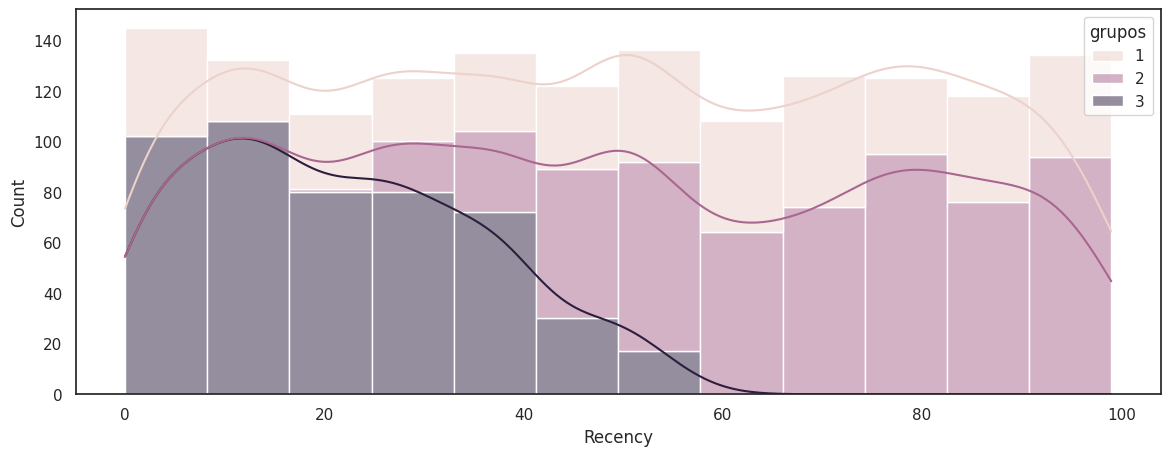

In [ ]:
sns.histplot(data=df_clean, x='Recency', hue='grupos', kde=True, multiple='stack')

<Axes: xlabel='Days_Registered', ylabel='Count'>

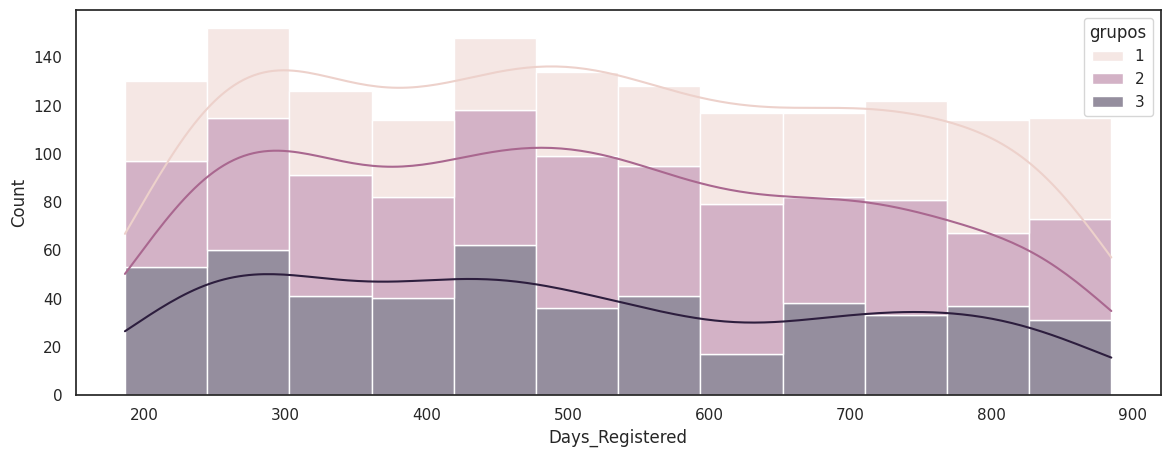

In [ ]:
sns.histplot(data=df_clean, x='Days_Registered', hue='grupos', kde=True, multiple='stack')

<Axes: xlabel='MntTotal', ylabel='Count'>

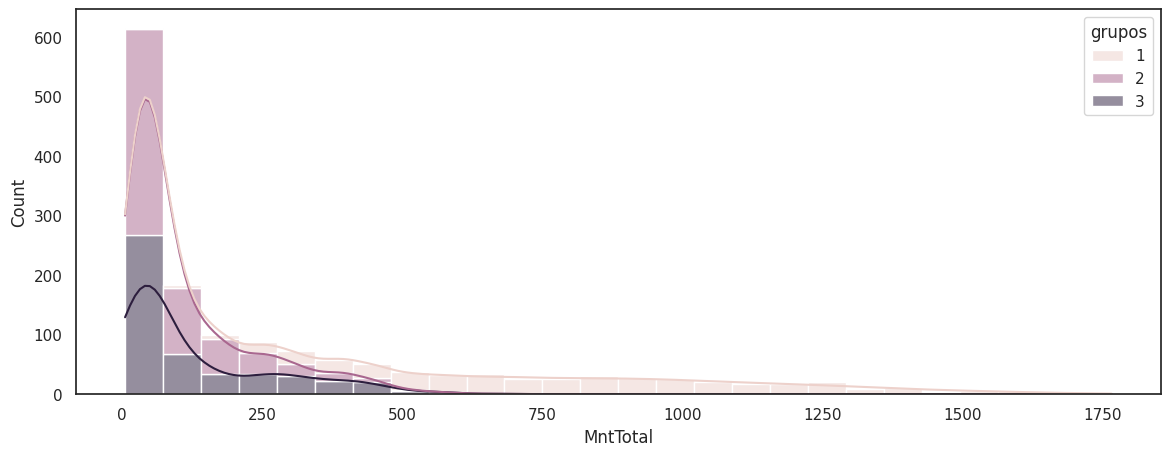

In [ ]:
sns.histplot(data=df_clean, x='MntTotal', hue='grupos', kde=True, multiple='stack')

<Axes: xlabel='Income', ylabel='Count'>

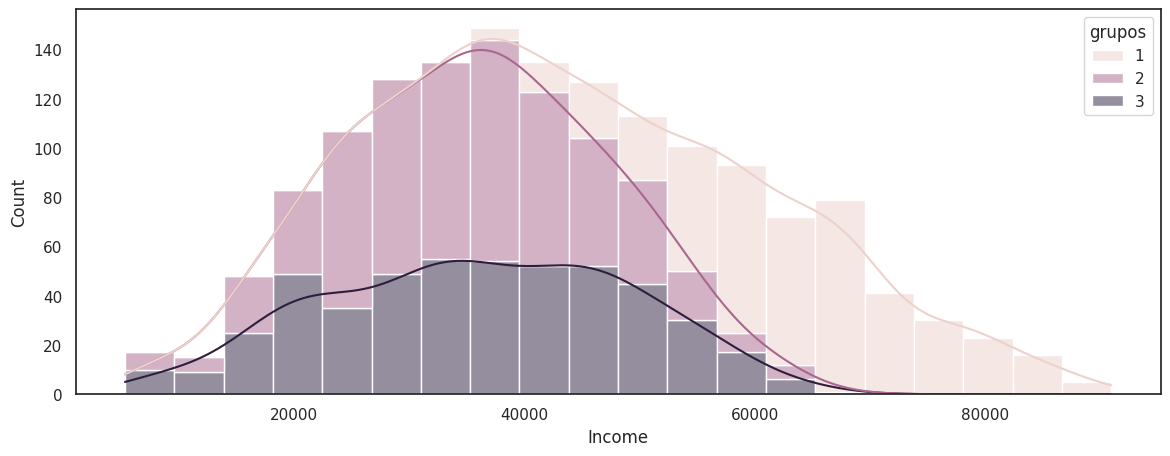

In [ ]:
sns.histplot(data=df_clean, x='Income', hue='grupos', kde=True, multiple='stack')

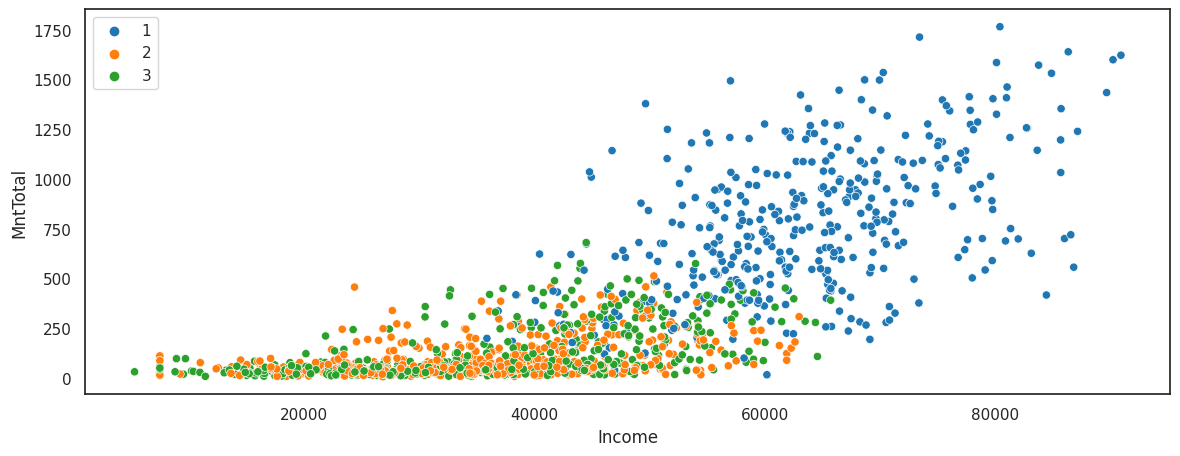

In [ ]:
sns.scatterplot(data=df_clean, x='Income', y='MntTotal',
                hue=grupos, palette='tab10');

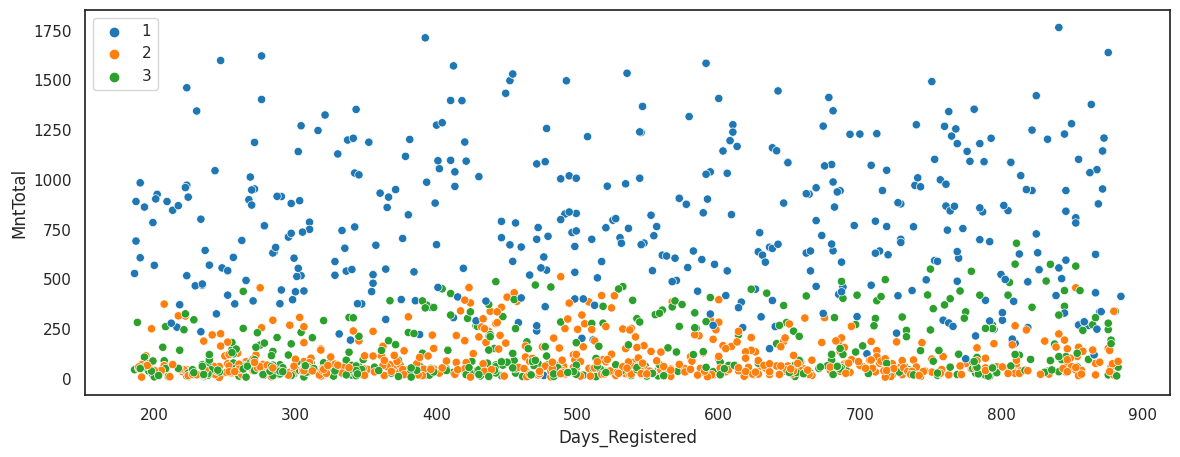

In [ ]:
sns.scatterplot(data=df_clean, x='Days_Registered', y='MntTotal',
                hue=grupos, palette='tab10');

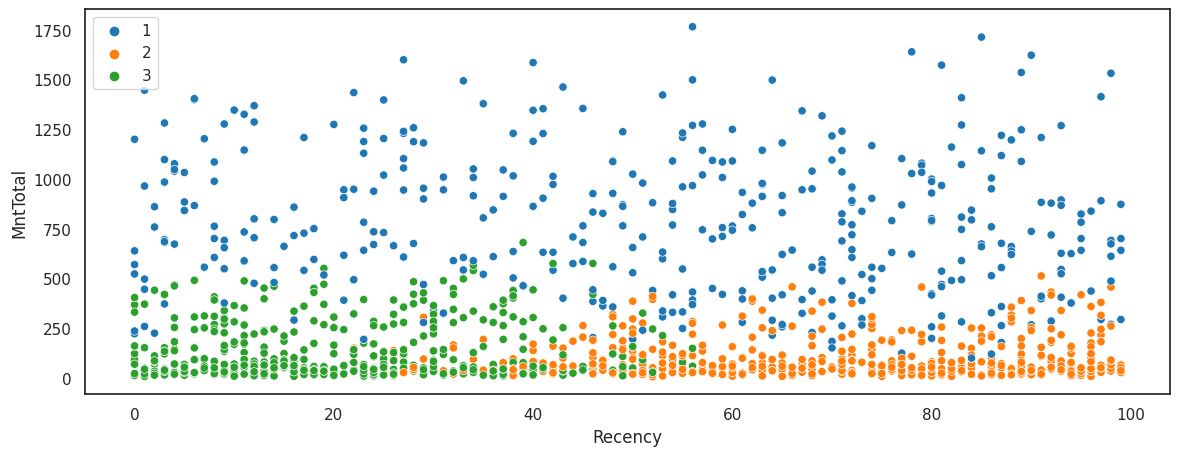

In [ ]:
sns.scatterplot(data=df_clean, x='Recency', y='MntTotal',
                hue=grupos, palette='tab10');

### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

Descrição dos Grupos:

* O grupo 1 é composto por pessoas que apresentam uma maior renda e um valor total maior gasto anualmente no mercado. De maneira geral este é um grupo que engloba tanto clientes que fizeram uma compra recentemente, quanto clientes que estão a mais tempo sem comprar.

* O grupo 2 é composto por pessoas que apresentam uma menor renda e um valor total menor gasto anuamente no mercado. De maneira geral este é um grupo que engloba mais clientes que estão a mais tempo sem comprar.

* O grupo 3 é composto por pessoas que também apresentam uma menor renda e um valor total menor gasto anuamente no mercado. Entretanto, este grupo de diferencia do grupo 2 por concentrar os clientes mais ativos, que realizaram pelo menos uma compra nos ultimos dois mesês.

### Para refletir:


####Quais outras variáveis poderíamos combinar ou processar para obter análises mais precisas?

Exemplo: e se comparássemos o valor gasto com a faixa de salário para entender esses valores percentualmente?

####Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot Encoding

Acho que uma primeira análise importante seria de discriminar os valores gastos por categoria, em vez de realizar apenas no montante total gasto. Outra ideita interessante seria utilziar as variáveis categóricas como escolaridade e respostas aos questionários para compor as personas dos agrupamentos. Neste sentido vária sentido utilizar a técnica de One Hot Encoding.

O One Hot Encoding é uma técnica de pré-processamento de dados usada para transformar variáveis categóricas em variáveis numéricas. Em muitos algoritmos de aprendizado de máquina, as variáveis de entrada devem ser numéricas, mas muitas vezes temos variáveis categóricas que não podem ser diretamente usadas pelos algoritmos. O One Hot Encoding resolve esse problema criando uma nova variável para cada categoria da variável categórica original. Cada nova variável conterá valores binários (0 ou 1) que indicam se uma observação pertence a uma determinada categoria ou não.